In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind_from_stats

In [2]:
PATH = "C:\\Users\\User\\Desktop\\without_DM_cases.csv"

In [3]:
df = pd.read_csv(PATH, encoding = 'big5')

In [4]:
df = df.rename(columns={'Unnamed: 0': 'name'})

In [5]:
df.head(30)

,name,No,lacune,microbleeds,PVS,WMH,frontal_mean,Parietal_mean,WM_mean,CH_mean,BG_mean,TH_mean,GM_mean,total_mean
0,田豐建,17632811,20,20,11,3,0.025921,0.027090,0.026505,0.030644,0.021889,0.050632,0.049997,0.031235
1,李水清,16066359,20,20,15,3,0.001295,0.002695,0.001995,0.002601,0.006266,0.006790,0.005219,0.003929
2,王月霞,6172756,15,30,13,3,0.052503,0.036393,0.107718,0.027341,0.054574,0.027027,0.036314,0.039568
3,朱黃彩華,4044501,3,30,13,3,0.042289,0.052360,0.047324,0.047518,0.075700,0.030690,0.051303,0.049711
4,陳東波,119044,7,11,8,3,0.028511,0.054034,0.041272,0.048937,0.030497,0.041620,0.040352,0.040720
5,蔡陳阿秀,18821113,1,2,6,2,0.008342,0.031281,0.019812,0.058133,0.084648,0.074954,0.072578,0.051471
6,洪天德,3125638,2,2,8,2,0.017444,0.022881,0.020162,0.013563,0.041014,0.032242,0.028940,0.025429
7,蔡宋緞,10409805,0,4,6,3,0.006565,0.003377,0.004971,0.007283,0.016435,0.008726,0.010815,0.008477
8,莊芳秋,19551371,2,0,8,2,0.009185,0.019724,0.014454,0.015371,0.084760,0.025538,0.041890,0.030916
9,林月甘,5150206,0,2,12,1,0.058759,0.068565,0.063662,0.044499,0.089093,0.044319,0.059304,0.061047


In [6]:
data = df.values[:,2:]

In [7]:
lacune = np.unique(df.lacune.values)
microbleeds = np.unique(df.microbleeds.values)
PVS = np.unique(df.PVS.values)
WMH = np.unique(df.WMH.values)
# total = np.unique(df.total.values)

In [8]:
Ki_location = ["frontal_mean","Parietal_mean","WM_mean","CH_mean","BG_mean","TH_mean","GM_mean","total_mean"]

In [9]:
lacune

array([ 0,  1,  2,  3,  7,  9, 15, 20], dtype=int64)

In [10]:
microbleeds

array([ 0,  1,  2,  4,  6, 11, 20, 21, 30], dtype=int64)

In [11]:
PVS

array([ 0,  2,  3,  4,  6,  7,  8, 11, 12, 13, 15, 19, 21], dtype=int64)

In [12]:
WMH

array([0, 1, 2, 3], dtype=int64)

In [13]:
pid = df.name.values

In [14]:
def criteria_filtering(input_data, lacune_array, microbleeds_array, PVS_array, WMH_array):
    filtering_result_mean = []
    filtering_result_var = []
    filtering_criteria_list = []
    filtering_separte_list = []
    filtering_separte_pid = []
    for lacune_num in lacune_array:
        for micro_num in microbleeds_array:
            for PVS_num in PVS_array:
                for WMH_num in WMH_array:
                    filtering_criteria_list.append([lacune_num, micro_num, PVS_num, WMH_num])
                    criteria =  (input_data[:,0]>=lacune_num) & (input_data[:,1]>=micro_num) & (input_data[:,2]>=PVS_num) & (input_data[:,3]>=WMH_num)
                    class1 = np.array(input_data[criteria][:,4:],dtype=np.float64)
                    class2 =  np.array(input_data[criteria == False][:,4:],dtype=np.float64)

                    class1_mean = np.mean(class1, axis=0)
                    class1_var = np.var(class1, axis=0)
                    class2_mean = np.mean(class2, axis=0)
                    class2_var = np.var(class2, axis=0)

                    filtering_result_mean.append([class1_mean, class2_mean])
                    filtering_result_var.append([class1_var, class2_var])
                    filtering_separte_list.append([class1, class2])
                    filtering_separte_pid.append([pid[criteria], pid[criteria==False]])
    return filtering_result_mean, filtering_result_var, filtering_criteria_list, filtering_separte_list, filtering_separte_pid

In [15]:
result_mean, result_var, criteria_list, separte_list, separte_pid = criteria_filtering(data, lacune, microbleeds, PVS, WMH)

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [16]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='black')


#### 這裡在出圖 WMH系列的

In [17]:
# gp1_0 = separte_list[0][0][:,3]
# gp2_0 = separte_list[0][1][:,3]
# gp1_1 = separte_list_1[0][0][:,3]
# gp2_1 = separte_list_1[0][1][:,3]

# bpl = plt.boxplot([gp1_0, gp1_1], positions=[1,1.7])
# bp2 = plt.boxplot([gp2_0, gp2_1], positions=[1.2,1.9])
# set_box_color(bpl, '#D7191C')
# set_box_color(bp2, '#2C7BB6')
# plt.plot([], c='#D7191C', label='group 1')
# plt.plot([], c='#2C7BB6', label='group 2')
# plt.xticks([1.1,1.8], ['WMH>=2 \n \n t = 2.271 \n p = 0.033 ', 'WMH>=2 \n Microbleeds>=1 \n t = 2.156 \np =0.0425'])
# plt.legend()
# plt.savefig('DM WMH series.png', dpi=1000)

#### 這裡出lacune的

In [18]:
# gp1_0 = separte_list[0][0][:,3]
# gp2_0 = separte_list[0][1][:,3]
# bpl = plt.boxplot([gp1_0], positions=[1])
# bp2 = plt.boxplot([gp2_0], positions=[1.25])
# set_box_color(bpl, '#D7191C')
# set_box_color(bp2, '#2C7BB6')
# plt.plot([], c='#D7191C', label='group 1')
# plt.plot([], c='#2C7BB6', label='group 2')
# plt.xticks([1.125], ['lacune>=1 \n \n t = 2.273 \n p = 0.034'])
# plt.legend()
# #plt.savefig('DM lacune.png', dpi=1000)

In [19]:
def degree_of_freedom(sigma_1, n_1, sigma_2, n_2):
    return ((sigma_1)/n_1+(sigma_2)/n_2)**2/((sigma_1/n_1)**2/(n_1-1)+(sigma_2/n_2)**2/(n_2-1))

In [20]:
degree_of_freedom(np.sqrt(10.6001), 10, np.sqrt(1.145), 8)

14.719691383067309

In [21]:
significant_array = []
significant_pid = []
for cri in range(len(criteria_list)):
    for Ki_loc in range(len(Ki_location)):
        gp1 = separte_list[cri][0][:,Ki_loc]
        gp2 = separte_list[cri][1][:,Ki_loc]
        if (len(gp1)>3) & (len(gp2)>3):
#             print(separte_list[cri])00
            n_1 = len(separte_list[cri][0][:,Ki_loc])
            mu_1 = result_mean[cri][0][Ki_loc]
            sigma_1 = result_var[cri][0][Ki_loc]*n_1/(n_1-1)
            
            n_2 = len(separte_list[cri][1][:,Ki_loc])
            mu_2 = result_mean[cri][1][Ki_loc]
            sigma_2 = result_var[cri][1][Ki_loc]*n_2/(n_2-1)
            
            t_est = abs(mu_1-mu_2)/np.sqrt(sigma_1/n_1+sigma_2/n_2)
#             print(abs(result_mean[cri][0][Ki_loc]-result_mean[cri][1][Ki_loc]))
#             print(Z)
            dof = degree_of_freedom(sigma_1, n_1, sigma_2, n_2) 
            if t_est>t.ppf(0.975, dof):
                print( 2*(1 - t.cdf(t_est,df=dof)))
                significant_array.append([2*(1 - t.cdf(t_est,df=dof)), Ki_location[Ki_loc], 
                              criteria_list[cri][0],
                              criteria_list[cri][1],
                              criteria_list[cri][2],
                              criteria_list[cri][3]])
                significant_pid.append(separte_pid[cri])
                label_1 = "group 1, n1 = "+str(len(gp1))
                label_2 = "group 2, n2 = "+str(len(gp2))
#                 plt.figure(figsize=[10.4,4.8])
#                 bpl = plt.boxplot(gp1, positions=[1])
#                 bp2 = plt.boxplot(gp2, positions=[1.4])
# #                 plt.plot([1.1, 1.1], [0, result_mean[cri][0][Ki_loc]+2*result_var[cri][0][Ki_loc]])
# #                 plt.plot([1.3, 1.3], [0, result_mean[cri][1][Ki_loc]+2*result_var[cri][1][Ki_loc]])
#                 set_box_color(bpl, '#D7191C')
#                 set_box_color(bp2, '#2C7BB6')
                
#                 plt.xticks([1, 1.4], [label_1, label_2])
#                 plt.suptitle("p = "+str(round(2*(1 - t.cdf(t_est,df=dof)),3))+ " with position at "+str(Ki_loc)+ " criteria :  lacune >= "+str(criteria_list[cri][0])+" microbleeds >= "+str(criteria_list[cri][1])+" PVS >= "+str(criteria_list[cri][2])+" WMH >= "+str(criteria_list[cri][3]))
# #                 plt.hist(gp1, bins = 15, rwidth=2, color='#D7191C')
# #                 plt.hist(gp2, bins = 10, rwidth=1, color='#2C7BB6')
# #                 plt.savefig("C:\\Users\\User\\Desktop\\without_DM\\"+"with position at_ "+str(Ki_loc)+ "_lacune"+str(criteria_list[cri][0])+"_microbleeds"+str(criteria_list[cri][1])+"_PVS_"+str(criteria_list[cri][2])+"_WMH_"+str(criteria_list[cri][3])+".png")
#                 plt.show()
                

0.0175589407889023
0.012357968652745965
0.022077110691407054
0.005617333843485062
0.005923667278759703
0.0003314197904027427
0.0008749993584187266
0.000664677666971647
0.0175589407889023
0.012357968652745965
0.022077110691407054
0.005617333843485062
0.005923667278759703
0.0003314197904027427
0.0008749993584187266
0.000664677666971647
0.024985500720904552
0.022074998719709304
0.028201223623667726
0.023788252616187
0.009729448054433876
0.00984590068657365
0.003864344281136578
0.014783427358388446
0.008695991684654958
0.01919479034418492
0.005685840140020382
0.0053620462074159825
0.013322037035810474
0.0021655742084882856
0.0011228359127803955
0.032810029477300606
0.030482089437301685
0.04275973932446986
0.04694130105789229
0.030896509627831747
0.029057788508890736
0.03477834429340332
0.039029683624537403
0.04526434814160951
0.024166290319646677
0.02243387145283604
0.03246705757608215
0.04686516919113504
0.024549044810427745
0.035245720848952056
0.035245720848952056
0.028139969574852763
0

In [514]:
significant_array

[[0.021241595364145827, 'Parietal_mean', 0, 0, 6, 0],
 [0.022356644557745664, 'WM_mean', 0, 0, 6, 0],
 [0.034941996813782294, 'Parietal_mean', 0, 0, 6, 1],
 [0.03694996599783806, 'WM_mean', 0, 0, 6, 1],
 [0.01702394153761211, 'Parietal_mean', 0, 0, 6, 3],
 [0.03315932156020063, 'WM_mean', 0, 0, 6, 3],
 [0.034941996813782294, 'Parietal_mean', 0, 0, 7, 0],
 [0.03694996599783806, 'WM_mean', 0, 0, 7, 0],
 [0.034941996813782294, 'Parietal_mean', 0, 0, 7, 1],
 [0.03694996599783806, 'WM_mean', 0, 0, 7, 1],
 [0.01702394153761211, 'Parietal_mean', 0, 0, 7, 3],
 [0.03315932156020063, 'WM_mean', 0, 0, 7, 3],
 [0.01702394153761211, 'Parietal_mean', 0, 0, 8, 3],
 [0.03315932156020063, 'WM_mean', 0, 0, 8, 3],
 [0.01702394153761211, 'Parietal_mean', 0, 0, 10, 3],
 [0.03315932156020063, 'WM_mean', 0, 0, 10, 3],
 [0.047133514135033305, 'CH_mean', 0, 1, 4, 3],
 [0.047133514135033305, 'CH_mean', 0, 2, 4, 3],
 [0.013051844260679513, 'Parietal_mean', 1, 0, 6, 0],
 [0.028651621623950074, 'WM_mean', 1, 0, 6,

In [22]:
df_signif = pd.DataFrame(significant_array, columns = ['p values', 'position', "lacune","microbleeds","PVS","WMH"])
df_pid = pd.DataFrame(significant_pid, columns = ["Group 1", "Group2"])

In [23]:
df_pid

,Group 1,Group2
0,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 蔡宋緞, 莊芳秋...","[駱佳宜, 黃佩倫, 蔡麗娟, 簡軍安, 何邦正]"
1,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 蔡宋緞, 莊芳秋...","[駱佳宜, 黃佩倫, 蔡麗娟, 簡軍安, 何邦正]"
2,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 蔡宋緞, 莊芳秋...","[駱佳宜, 黃佩倫, 蔡麗娟, 簡軍安, 何邦正]"
3,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 蔡宋緞, 莊芳秋...","[駱佳宜, 黃佩倫, 蔡麗娟, 簡軍安, 何邦正]"
4,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 蔡宋緞, 莊芳秋...","[駱佳宜, 黃佩倫, 蔡麗娟, 簡軍安, 何邦正]"
...,...,...
385,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 楊周罔受]","[蔡宋緞, 莊芳秋, 林月甘, 董喬錦, 黃劉金枝, 楊釵, 黃善女, 駱佳宜, 施榮興, ..."
386,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 楊周罔受]","[蔡宋緞, 莊芳秋, 林月甘, 董喬錦, 黃劉金枝, 楊釵, 黃善女, 駱佳宜, 施榮興, ..."
387,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 楊周罔受]","[蔡宋緞, 莊芳秋, 林月甘, 董喬錦, 黃劉金枝, 楊釵, 黃善女, 駱佳宜, 施榮興, ..."
388,"[田豐建, 李水清, 王月霞, 朱黃彩華, 陳東波, 蔡陳阿秀, 洪天德, 楊周罔受]","[蔡宋緞, 莊芳秋, 林月甘, 董喬錦, 黃劉金枝, 楊釵, 黃善女, 駱佳宜, 施榮興, ..."


In [26]:
df_signif.to_csv('C:\\Users\\User\\Desktop\\without DM significance.csv')
df_pid.to_csv('C:\\Users\\User\\Desktop\\without DM significance reference pid.csv', encoding = 'big5')


## Total v.s CH 

In [219]:
total_means = df.total_mean.values
CH_mean = df.CH_mean.values
frontal_mean = df.frontal_mean.values
Parietal_mean = df.Parietal_mean.values
WM_mean = df.WM_mean.values
BG_mean = df.BG_mean.values
TH_mean = df.TH_mean.values

In [220]:
import statsmodels.api as sm

In [221]:
from statsmodels.sandbox.regression.predvar import wls_prediction_var

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     33.54
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.15e-05
Time:                        20:02:30   Log-Likelihood:                 60.583
No. Observations:                  22   AIC:                            -117.2
Df Residuals:                      20   BIC:                            -115.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      0.004      1.760      0.0

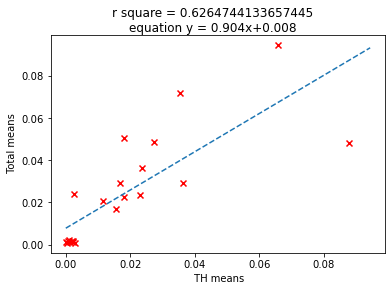

In [230]:
model = sm.OLS( total_means.reshape(-1, 1), sm.add_constant(TH_mean.reshape(-1, 1))) #(y,X)
results = model.fit()
print(results.summary())

results = model.fit()
results_text = results.summary().as_text()

# import csv
# resultFile = open("WM_mean without DM_table.csv",'w')
# resultFile.write(results_text)
# resultFile.close()

plt.scatter(TH_mean,total_means, marker = 'x', color = 'r')
plt.xlabel(" TH means")
plt.ylabel(" Total means")
plt.suptitle('r square = '+str(results.rsquared)+'\n'+'equation y = '+str(round(results.params[1],3))+'x+'+str(round(results.params[0],3)))

# plt.suptitle('rr')
X = np.linspace(0, max(total_means),50)
plt.plot(X, results.params[0]+results.params[1]*X, '--')
plt.savefig('DM TH mean total.png', dpi = 600)
plt.show()

## GM vs 

In [24]:
WM = [df.frontal_mean.values,df.Parietal_mean.values]
GM = [df.CH_mean.values,df.BG_mean.values,df.TH_mean.values]

In [25]:
WM_index = ['frontal mean', 'parietal mean']
GM_index = ['CH mean', 'BG mean', 'TH mean']

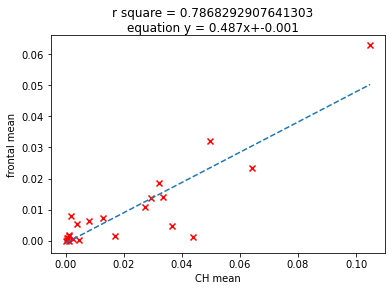

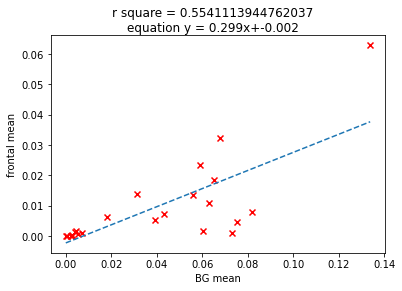

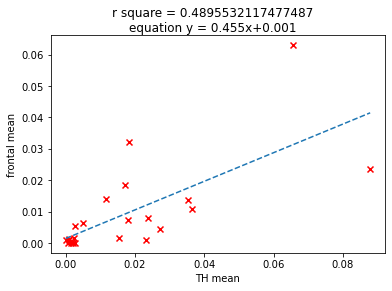

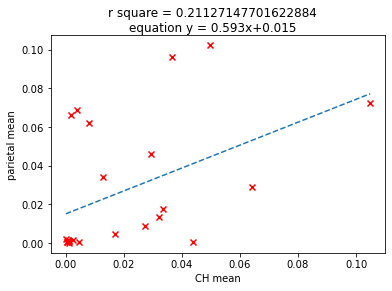

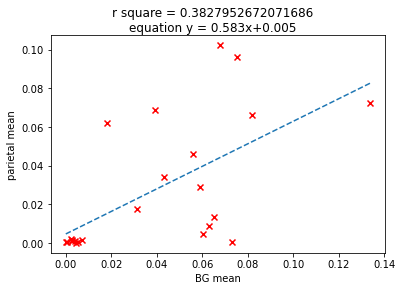

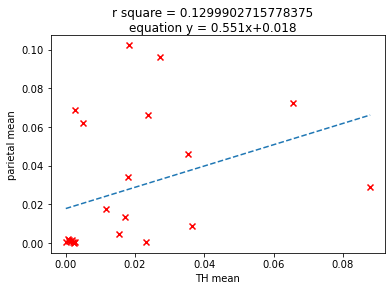

In [26]:
count = 0
for WM_idx in range(len(WM)):
    for GM_idx in range(len(GM)):
        model = sm.OLS( WM[WM_idx].reshape(-1, 1), sm.add_constant(GM[GM_idx].reshape(-1, 1))) #(y,X)
        results = model.fit()
        plt.scatter(GM[GM_idx],WM[WM_idx], marker = 'x', color = 'r')
        plt.xlabel(GM_index[GM_idx])
        plt.ylabel(WM_index[WM_idx])
        plt.suptitle('r square = '+str(results.rsquared))
        plt.suptitle('r square = '+str(results.rsquared)+'\n'+'equation y = '+str(round(results.params[1],3))+'x+'+str(round(results.params[0],3)))

        X = np.linspace(0, max(GM[GM_idx]),50)
        plt.plot(X, results.params[0]+results.params[1]*X, '--')
        if results.rsquared > 0.7:
            plt.savefig("DM GM WM coorelation fig "+str(count)+'.png')
            count+=1
        plt.show()

In [193]:
DM_with_CSVD = data[:13][:,4::]
DM_without_CSVD = data[13::][:,4::]

In [194]:
len(DM_without_CSVD)

12

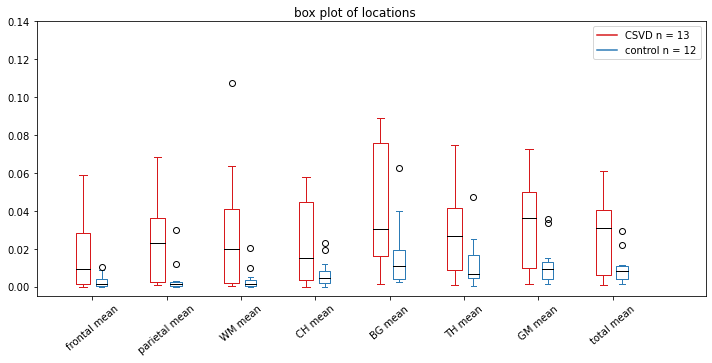

In [195]:
plt.figure(figsize=(10,5))
bpl = plt.boxplot(DM_with_CSVD, positions=[3+4*i-.5 for i in range(8)],  widths = 0.8)
bp2 = plt.boxplot(DM_without_CSVD,positions = [3+4*i+.5 for i in range(8)],  widths = 0.6)
plt.xticks([3+4*i for i in range(8)], ['frontal mean', 'parietal mean', 'WM mean','CH mean', 'BG mean', 'TH mean', 'GM mean', 'total mean'], rotation = 40)
# plt.xticks(['frontal mean', 'parietal mean', 'WM mean','CH mean', 'BG mean', 'TH mean', 'GM mean', 'total mean'])
plt.xlim(0,36)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')
plt.plot([], c='#D7191C', label='CSVD n = 13')
plt.plot([], c='#2C7BB6', label='control n = 12')
plt.ylim((-0.005,0.14))
plt.suptitle('box plot of locations ', y=1)
plt.tight_layout()
plt.legend()
plt.savefig('control box plot.png', dpi = 500)

plt.show()

In [196]:
for i in range(8):
    Z = abs(np.mean(DM_with_CSVD[:,i])-np.mean(DM_without_CSVD[:,i]))/np.sqrt((np.var(DM_with_CSVD[:,i])**2)/len(DM_with_CSVD[:,i])+(np.var(DM_without_CSVD[:,i])**2)/len(DM_without_CSVD[:,i]))
    print(Z)

2.936221943130895
3.0726359458270838
2.712830380738192
2.6950540448159988
2.3593807184153013
2.2340765084628535
2.7560836531845423
2.850041516585889
